In [10]:
# filepath: /home/sivert/Documents/Master_AttentionalDirectionResearch/notebooks/old_data_inspection.ipynb
import os
import pickle
import numpy as np
import pandas as pd

directory_path = "/home/sivert/Documents/Specialization_project/computed_data"
subject_id_to_inspect = "078"  # Change this to the subject ID you want to inspect

loaded_data = {}

for filename in os.listdir(directory_path):
    if filename.endswith(".pkl") and f"sub-{subject_id_to_inspect}" in filename:
        filepath = os.path.join(directory_path, filename)
        try:
            with open(filepath, 'rb') as f:
                data = pickle.load(f)
                loaded_data[filename] = data
                print(f"Loaded {filename} with keys: {list(data.keys()) if isinstance(data, dict) else type(data)}")

                # Inspect the structure of the data within each key
                for key, value in data.items():
                    print(f"\n--- Inspecting key: '{key}' ---")
                    if isinstance(value, dict):
                        print(f"  - Type: Dictionary with keys: {list(value.keys())}")
                    elif isinstance(value, np.ndarray):
                        print(f"  - Type: NumPy array with shape: {value.shape} and dtype: {value.dtype}")
                    elif isinstance(value, pd.DataFrame):
                        print(f"  - Type: Pandas DataFrame with shape: {value.shape} and columns: {list(value.columns)}")
                    else:
                        print(f"  - Type: {type(value)}")

        except Exception as e:
            print(f"Error loading {filename}: {e}")

if loaded_data:
    print(f"\nSuccessfully loaded and inspected data for subject {subject_id_to_inspect}.")
else:
    print(f"\nNo data found for subject {subject_id_to_inspect}.")

Loaded internal_task_sub-078.pkl with keys: ['info', 'focus', 'mind_wander', 'difference']

--- Inspecting key: 'info' ---
  - Type: Dictionary with keys: ['subject', 'task_type', 'frequency_band', 'spectral_axis', 'ch_names', 'focus', 'mw']

--- Inspecting key: 'focus' ---
  - Type: Dictionary with keys: ['psd_data', 'per_epoch_per_freq', 'mean_per_freq', 'variance_per_freq', 'per_epoch_per_channel', 'per_epoch', 'mean_per_channel', 'variance_per_channel', 'mean', 'variance', 'median']

--- Inspecting key: 'mind_wander' ---
  - Type: Dictionary with keys: ['psd_data', 'per_epoch_per_freq', 'mean_per_freq', 'variance_per_freq', 'per_epoch_per_channel', 'per_epoch', 'mean_per_channel', 'variance_per_channel', 'mean', 'variance', 'median']

--- Inspecting key: 'difference' ---
  - Type: Dictionary with keys: ['mean', 'variance', 'median', 'mean_per_channel', 'variance_per_channel', 'mean_per_freq', 'variance_per_freq']

Successfully loaded and inspected data for subject 078.


In [11]:
# Print the shape of 'psd_data' in 'focus' and 'mind_wander'
print("Shape of 'focus' psd_data:", data['focus']['psd_data'].shape)
print("Shape of 'mind_wander' psd_data:", data['mind_wander']['psd_data'].shape)

# Print the 'info' dictionary
print("\nInfo dictionary:")
print(data['info'])

# Print the 'spectral_axis'
print("\nSpectral axis:")
print(data['info']['spectral_axis'])

Shape of 'focus' psd_data: (117, 64, 20)
Shape of 'mind_wander' psd_data: (110, 64, 20)

Info dictionary:
{'subject': '078', 'task_type': 'internal_task', 'frequency_band': 'alpha', 'spectral_axis': array([ 8.18720749,  8.38689548,  8.58658346,  8.78627145,  8.98595944,
        9.18564743,  9.38533541,  9.5850234 ,  9.78471139,  9.98439938,
       10.18408736, 10.38377535, 10.58346334, 10.78315133, 10.98283931,
       11.1825273 , 11.38221529, 11.58190328, 11.78159126, 11.98127925]), 'ch_names': ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2'], 'focus': ('med2', None), 'mw': ('think2', None)}

Spectral axis:
[ 8.18720749  8.

In [12]:
import numpy as np

psd_ot_db = 10*np.log10(data['focus']['psd_data'])
psd_mw_db = 10*np.log10(data['mind_wander']['psd_data'])

psd_ot_alpha = psd_ot_db.mean(axis=-1)
psd_mw_alpha = psd_mw_db.mean(axis=-1)

mean_psd_ot = np.mean(psd_ot_alpha, axis=0)
mean_psd_mw = np.mean(psd_mw_alpha, axis=0)

# print shape of mean_psd_ot and mean_psd_mw
print("\nMean PSD for 'focus' (alpha band):", mean_psd_ot.shape)
print("Mean PSD for 'mind_wander' (alpha band):", mean_psd_mw.shape)


Mean PSD for 'focus' (alpha band): (64,)
Mean PSD for 'mind_wander' (alpha band): (64,)


In [13]:
# Print each element of mean_psd_ot and mean_psd_mw against each other on one line
for ot, mw in zip(mean_psd_ot, mean_psd_mw):
    print(f"Focus: {ot:.2f}, Mind Wander: {mw:.2f}, difference: {ot - mw:.2f}")

Focus: -119.95, Mind Wander: -125.05, difference: 5.10
Focus: -118.92, Mind Wander: -125.39, difference: 6.47
Focus: -120.51, Mind Wander: -121.97, difference: 1.46
Focus: -118.87, Mind Wander: -121.33, difference: 2.46
Focus: -119.06, Mind Wander: -121.63, difference: 2.57
Focus: -118.84, Mind Wander: -122.45, difference: 3.61
Focus: -118.91, Mind Wander: -124.24, difference: 5.33
Focus: -118.77, Mind Wander: -125.88, difference: 7.11
Focus: -119.85, Mind Wander: -123.98, difference: 4.13
Focus: -119.84, Mind Wander: -121.44, difference: 1.60
Focus: -119.67, Mind Wander: -121.06, difference: 1.39
Focus: -121.20, Mind Wander: -120.67, difference: -0.53
Focus: -121.61, Mind Wander: -120.93, difference: -0.68
Focus: -121.49, Mind Wander: -123.15, difference: 1.66
Focus: -118.64, Mind Wander: -123.16, difference: 4.52
Focus: -117.64, Mind Wander: -118.88, difference: 1.24
Focus: -121.13, Mind Wander: -120.84, difference: -0.28
Focus: -121.41, Mind Wander: -120.43, difference: -0.98
Focus:

In [21]:
def compute_psd(epochs, eeg_settings):
    """
    Compute the Power Spectral Density (PSD) using Welch's method for the given EEG epochs.

    Parameters:
        epochs (mne.Epochs): EEG epochs data.
        eeg_settings (dict): Dictionary with PSD parameters including scaling factor.

    Returns:
        tuple: 
            - psd (ndarray): PSD array (epochs × channels × frequencies), scaled to µV²/Hz.
            - freqs (ndarray): Frequency values in Hz.
    """
    psd, freqs = mne.time_frequency.psd_array_welch(
        epochs.get_data(),
        sfreq=epochs.info['sfreq'],
        fmin=eeg_settings["PSD_FMIN"],
        fmax=eeg_settings["PSD_FMAX"],
        n_fft=eeg_settings["PSD_N_FFT"],
        n_per_seg=eeg_settings["PSD_N_PER_SEG"],
        n_overlap=eeg_settings["PSD_N_OVERLAP"],
        window=eeg_settings["PSD_WINDOW"],
        average=eeg_settings["PSD_AVERAGE_METHOD"],
        output=eeg_settings["PSD_OUTPUT"],
        n_jobs=12,
        remove_dc=eeg_settings["PSD_REMOVE_DC"],
        verbose=False
    )

    # Apply unit scaling (e.g., V² → µV²)
    psd *= eeg_settings["PSD_UNIT_CONVERT"]

    return psd, freqs

In [23]:
import mne
import os
from utils.config import DATASETS, EEG_SETTINGS
from utils.file_io import save_psd_data
from utils.helpers import generate_metadata_epochs

dataset = DATASETS['braboszcz2017']
subjects = dataset.subjects
tasks = dataset.tasks

epochs = {}

for subject in subjects:
    for task in tasks:
        if task=="think2":
            state= "MW"
        else:
            state = "OT"
        # Check if the epochs file exists for the subject and task
        print(f"Processing subject {subject} for task {task}")
        file_name = f"sub-{subject}_epo.fif"
        # Load files from /home/sivert/Documents/Specialization_project/epochs/internal_task/
        file_path = f"/home/sivert/Documents/Specialization_project/epochs/internal_task/{file_name}"
        if not os.path.exists(file_path):
            print(f"No epochs found for subject {subject} at {file_path}")
            continue

        print(f"Loading {file_path}")
        epochs = mne.read_epochs(file_path, preload=True)

        # Retrieve the group from event_id
        group = next((key.split('/')[0] for key in epochs.event_id if '/' in key), None)
        if not group:
            raise ValueError("No group found in event_id of the epochs")

        # Filter epochs based on task
        event_id = next((key for key in epochs.event_id if f"{group}/{task}" in key), None)
        if not event_id:
            raise ValueError(f"Task '{task}' not found in event_id of the epochs")
        epochs = epochs[event_id]
        # Pick EEG channels
        epochs.pick(picks="eeg", verbose=False)
        # Compute PSD
        for average_method in ['mean', 'median', None]:
            variant = f"avg-{average_method}"
            eeg_settings = EEG_SETTINGS.copy()
            eeg_settings["PSD_AVERAGE_METHOD"] = average_method

            psd, freqs = compute_psd(epochs, eeg_settings)

            # Generate metadata
            metadata = generate_metadata_epochs(
                psd_data=psd,
                eeg_settings=eeg_settings,
                dataset=dataset,
                subject=subject,
                session=1,
                task=task,
                state=state
            )

            save_psd_data(
                psd=psd,
                freqs=freqs,
                channels=epochs.ch_names,
                metadata=metadata,
                output_root=dataset.path_psd,
                subject=subject,
                session=1,
                task=task,
                state=state,
                variant=variant
            )


Processing subject 025 for task med2
No epochs found for subject 025 at /home/sivert/Documents/Specialization_project/epochs/internal_task/sub-025_epo.fif
Processing subject 025 for task think2
No epochs found for subject 025 at /home/sivert/Documents/Specialization_project/epochs/internal_task/sub-025_epo.fif
Processing subject 026 for task med2
No epochs found for subject 026 at /home/sivert/Documents/Specialization_project/epochs/internal_task/sub-026_epo.fif
Processing subject 026 for task think2
No epochs found for subject 026 at /home/sivert/Documents/Specialization_project/epochs/internal_task/sub-026_epo.fif
Processing subject 027 for task med2
No epochs found for subject 027 at /home/sivert/Documents/Specialization_project/epochs/internal_task/sub-027_epo.fif
Processing subject 027 for task think2
No epochs found for subject 027 at /home/sivert/Documents/Specialization_project/epochs/internal_task/sub-027_epo.fif
Processing subject 028 for task med2
No epochs found for subject

In [26]:
from eeg_analyzer.dataset import Dataset

dataset = DATASETS['braboszcz2017']
dataset = Dataset(dataset)

dataset.load_subjects()

In [31]:
import pandas as pd
from eeg_analyzer.statistics import Statistics

ctr_subs = dataset.get_group_subjects('ctr')
dataset.remove_subjects(ctr_subs)
df_data = dataset.to_long_band_power_list((8,12))

df = pd.DataFrame(df_data)

# create new df_summary that for each channel contains both state means of band_db
df_summary = Statistics.calculate_descriptive_stats_detailed(
    df=df,
    value_col='band_db',
    group_cols=['subject_session', 'channel'],
    state_col='state',
)
df_summary.head()

,subject_session,channel,mean,std,median,iqr,min,max,skewness,kurtosis,...,iqr_MW,min_MW,max_MW,skewness_MW,kurtosis_MW,count_MW,state_diff_mean,state_diff_median,group_size,subject_count
0,060_1,AF3,-119.258621,4.114305,-118.512546,5.215407,-132.997326,-111.335297,-0.792373,0.366474,...,6.966483,-132.997326,-112.686093,-0.351588,-0.546338,122,3.565715,3.505158,242,1
1,060_1,AF4,-118.881663,3.780480,-118.202099,4.448802,-130.440435,-111.275245,-0.772111,0.152717,...,5.179545,-130.440435,-111.275245,-0.248815,-0.496258,122,3.989517,3.611332,242,1
2,060_1,AF7,-123.134232,4.319053,-123.873237,4.574754,-132.125900,-110.868918,0.696698,0.073308,...,3.667181,-132.125900,-113.259571,1.166316,1.729259,122,3.898443,2.763145,242,1
3,060_1,AF8,-118.749639,3.493494,-118.117864,4.144554,-130.830474,-111.822853,-0.798144,0.288550,...,4.902316,-130.830474,-112.240079,-0.313638,-0.435647,122,3.490388,3.108263,242,1
4,060_1,AFz,-118.184407,3.486765,-117.603648,4.384876,-130.164833,-110.937555,-0.755350,0.283675,...,5.465522,-130.164833,-112.031024,-0.307965,-0.410112,122,3.314181,3.237490,242,1


In [52]:
from statsmodels.stats.multitest import multipletests

test = Statistics.perform_wilcoxon_test(
    df=df_summary,
    col1='mean_OT',
    col2='mean_MW',
    group_cols=['channel'],
    tail='greater'  # 'greater' for one-tailed test (OT > MW)
)


In [42]:

# Apply FDR correction (Benjamini-Hochberg)
reject, pvals_corrected, _, _ = multipletests(test['p_value'], alpha=0.05, method='fdr_bh')

In [44]:
# Present all the results
test['p_value_corrected'] = pvals_corrected
test['reject'] = reject
print(test[test['reject']==True])  # Only show significant results

Empty DataFrame
Columns: [channel, wilcoxon_statistic, p_value, p_value_corrected, reject]
Index: []


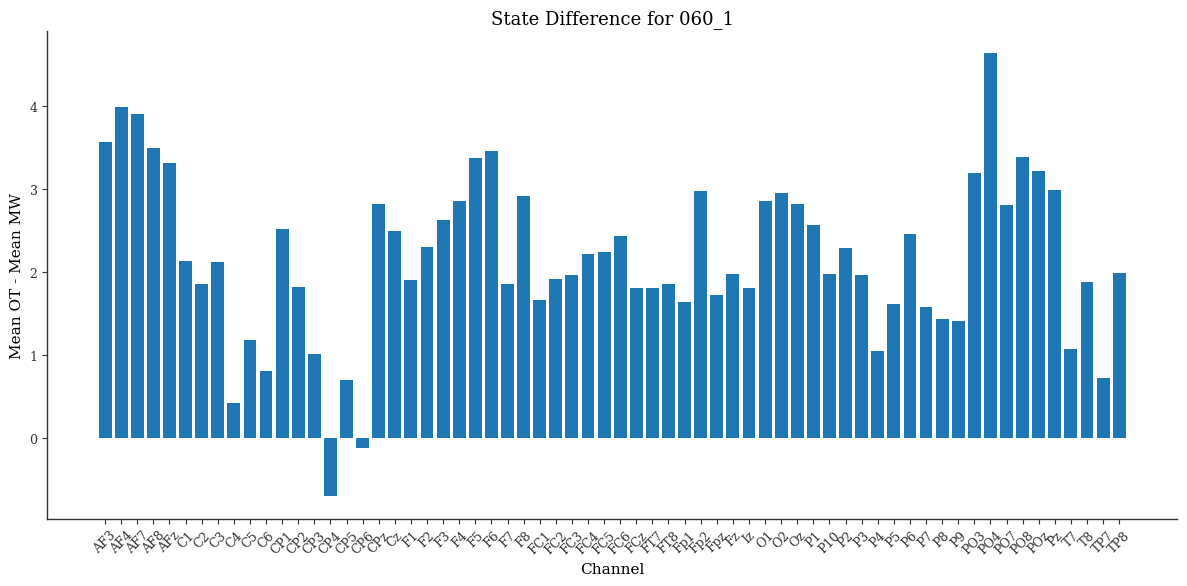

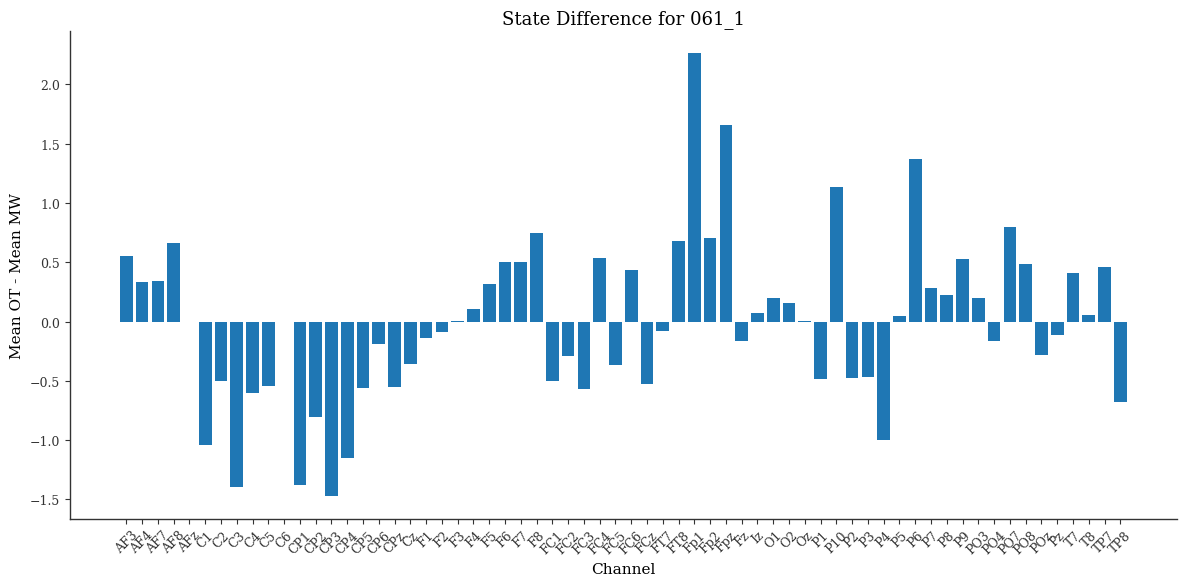

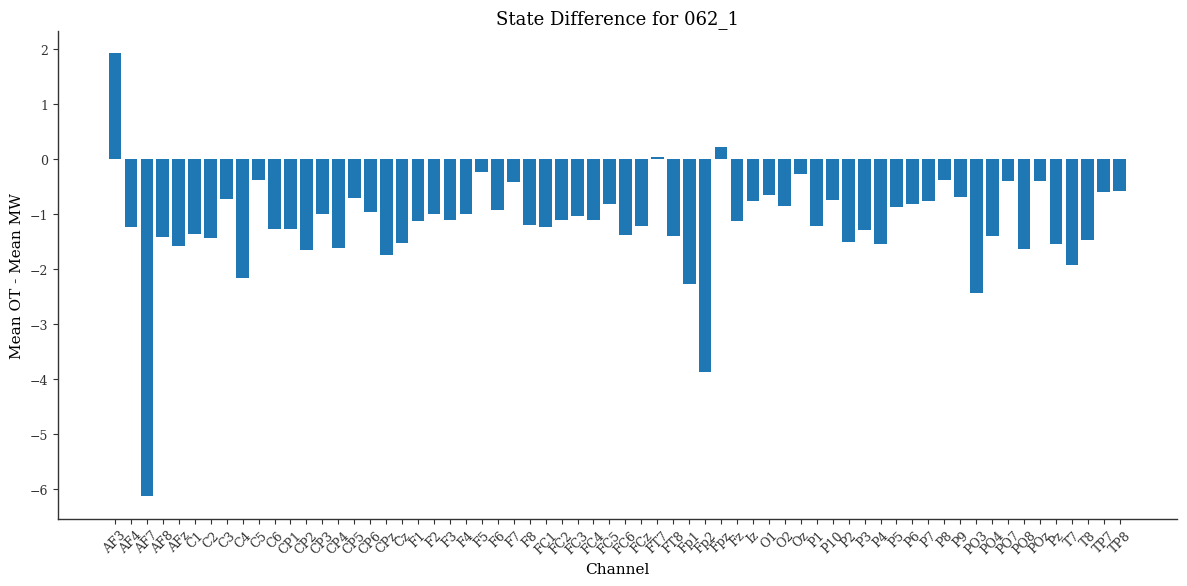

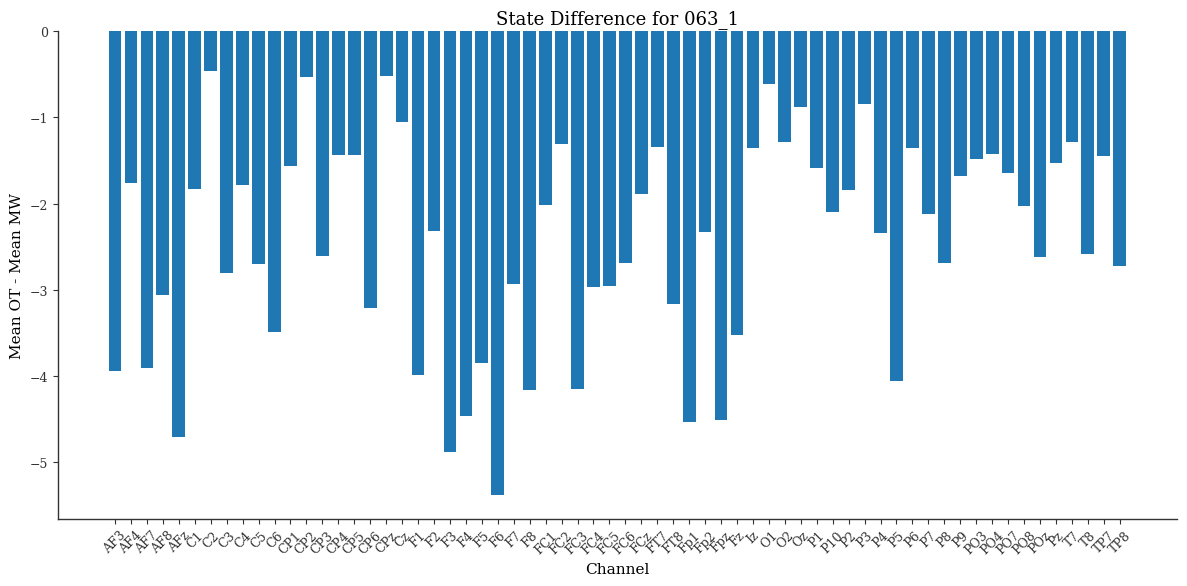

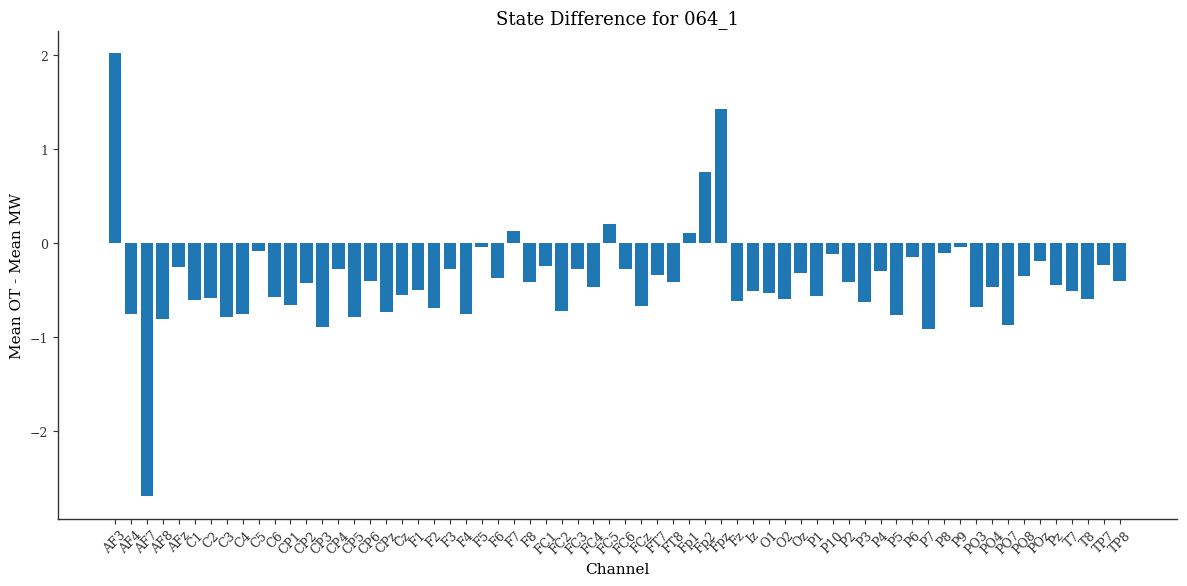

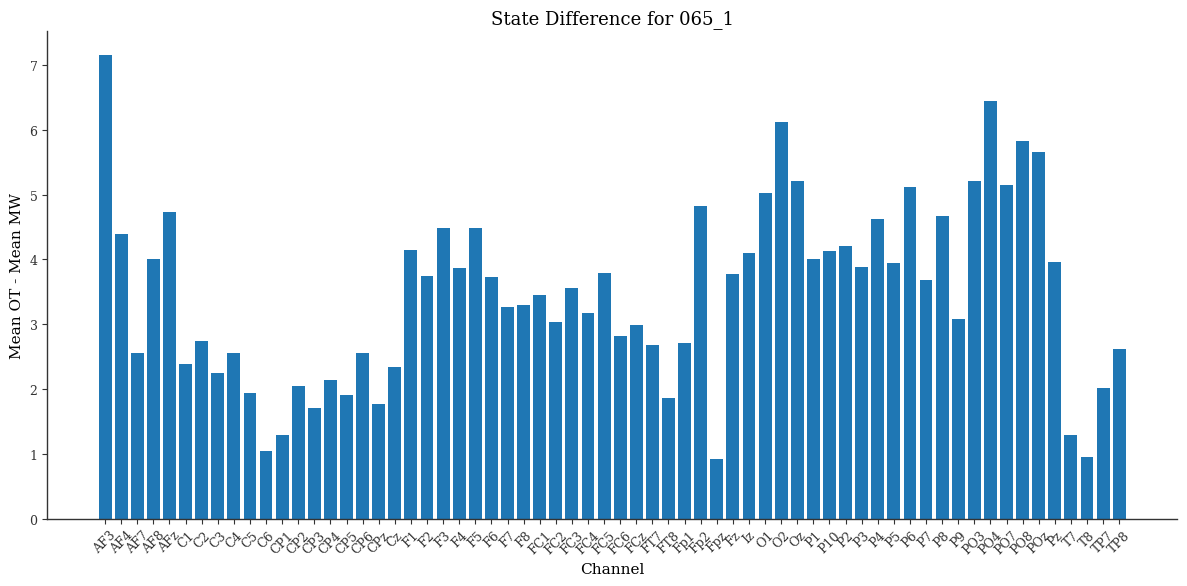

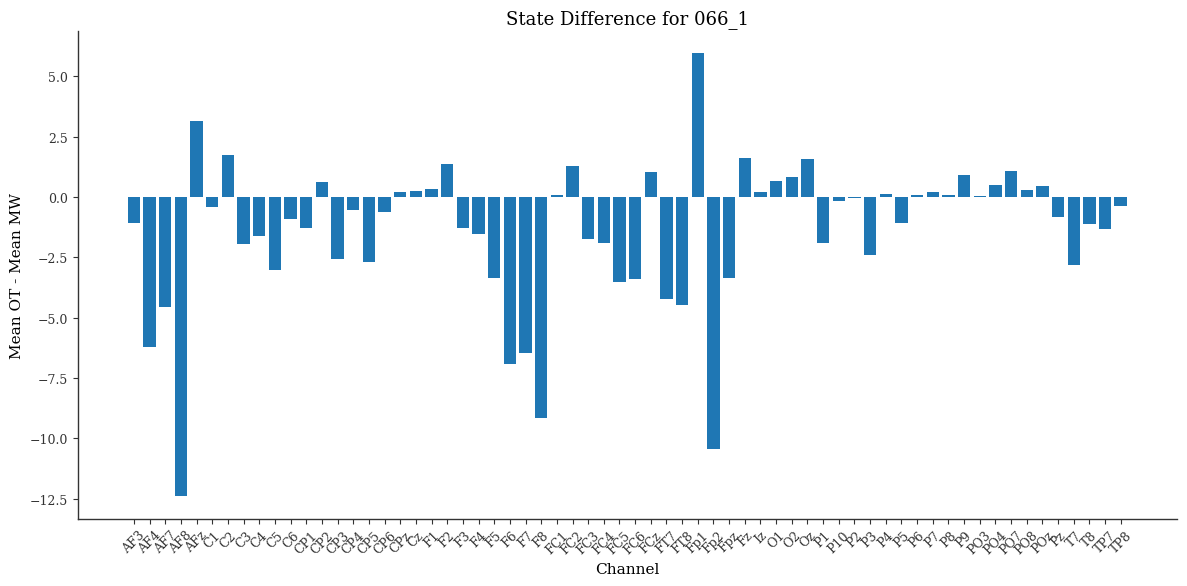

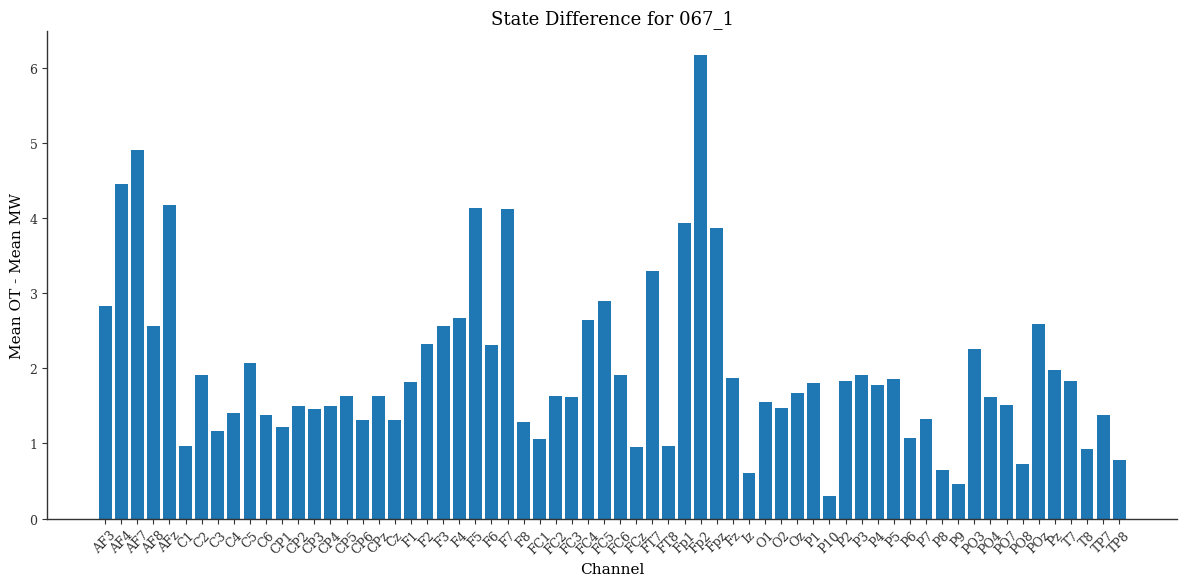

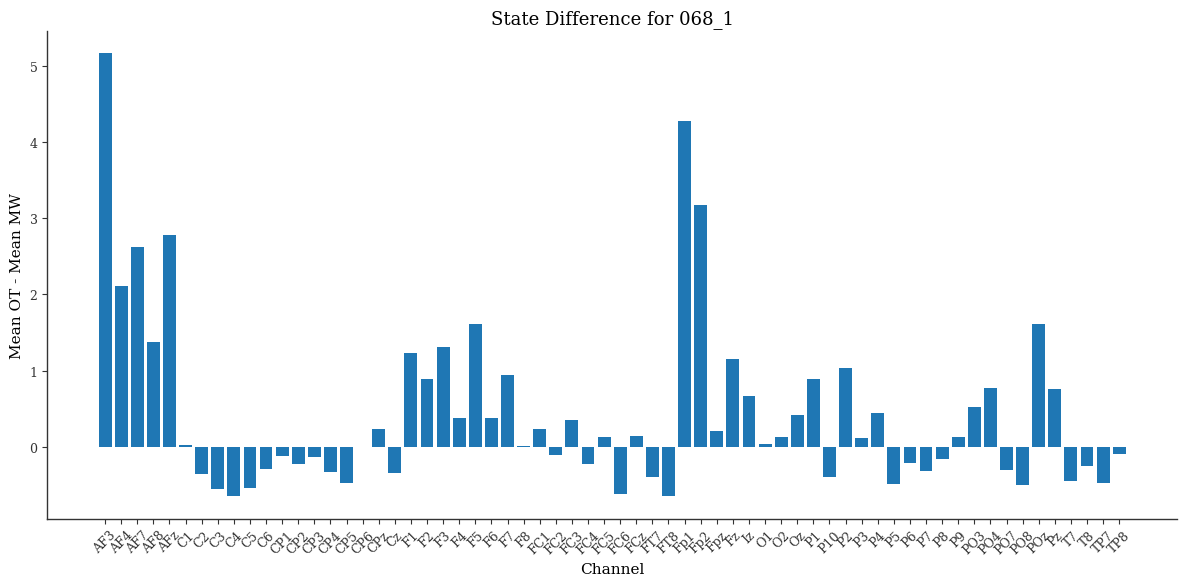

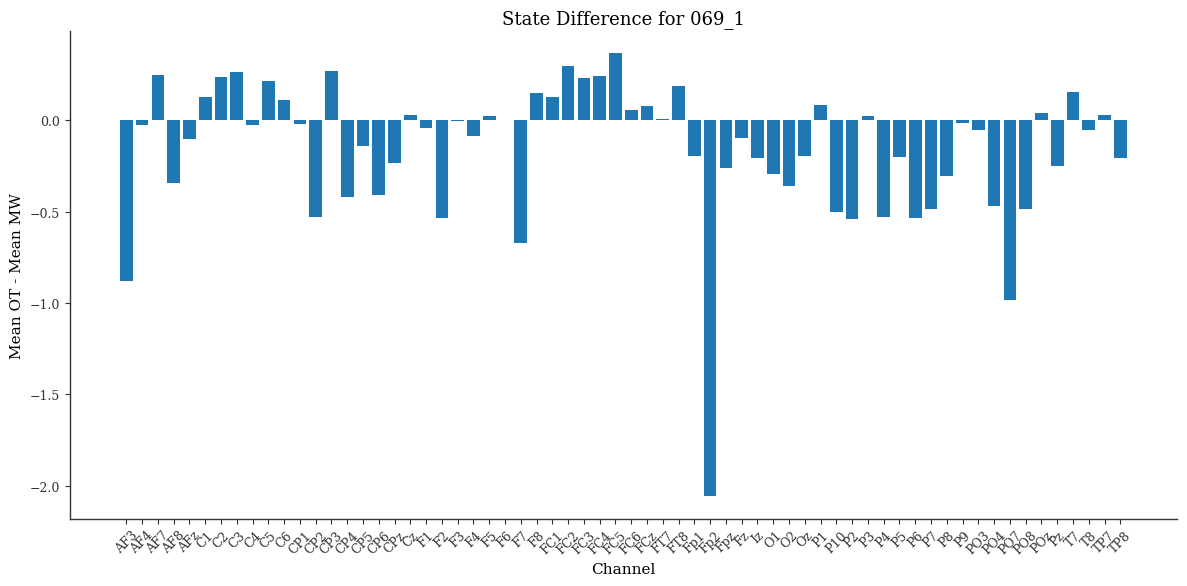

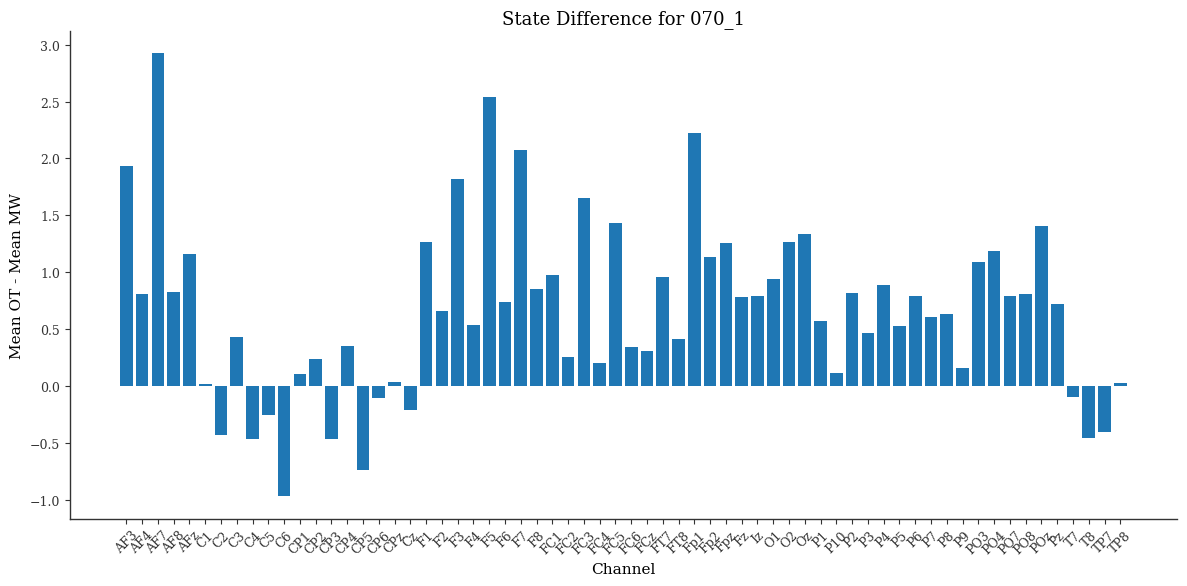

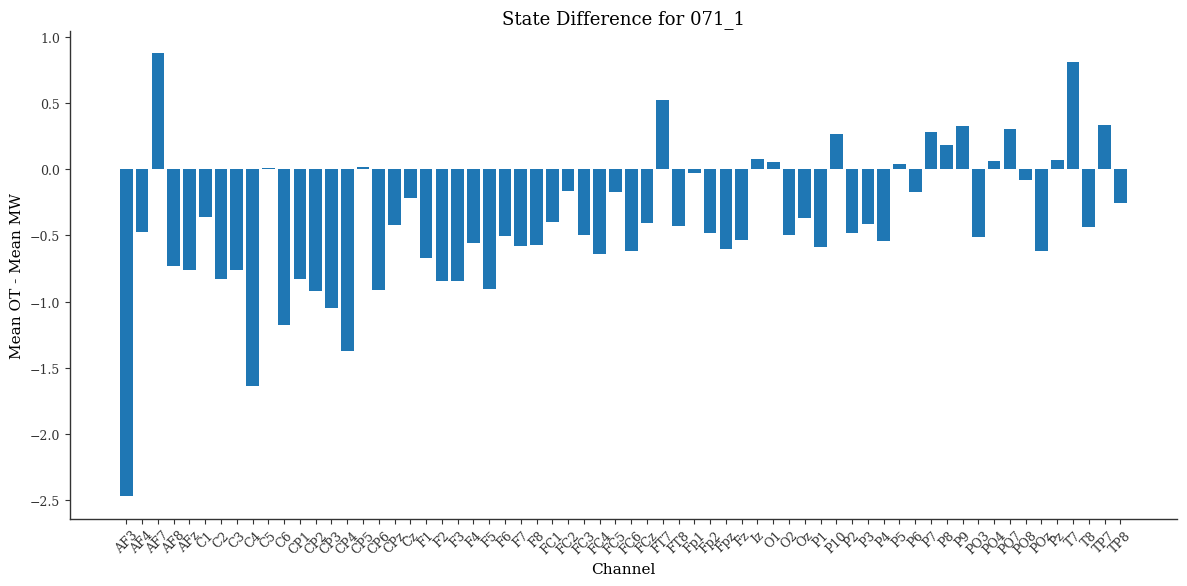

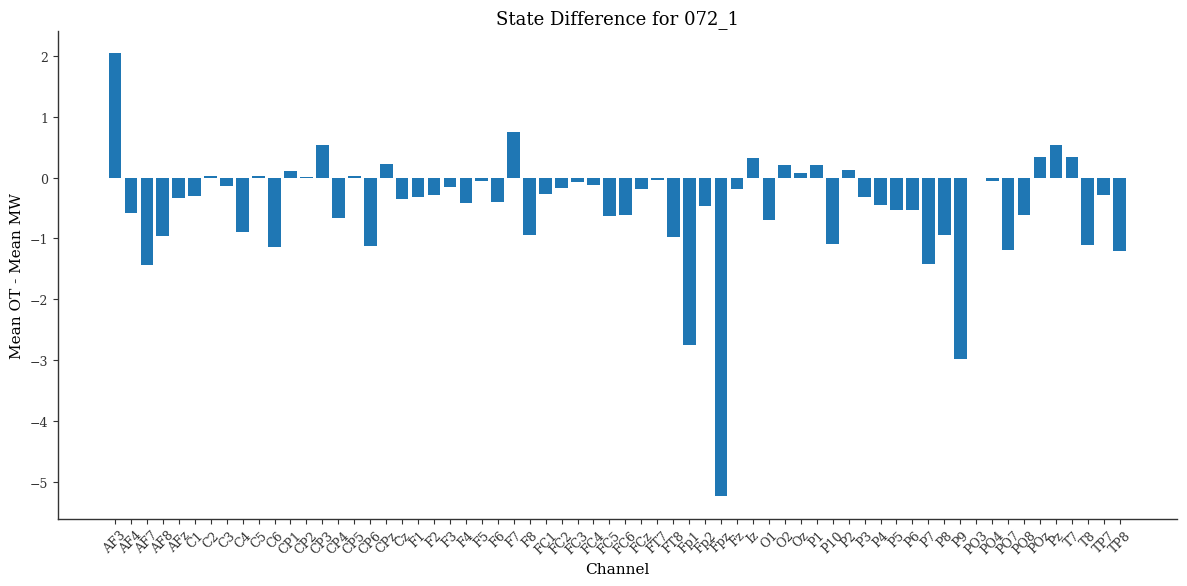

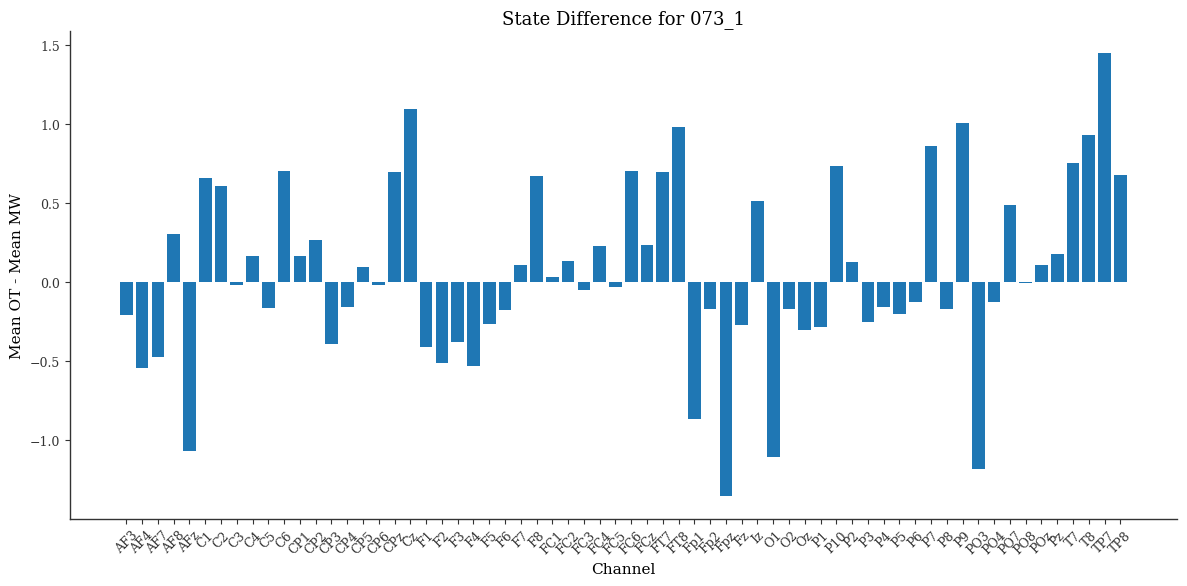

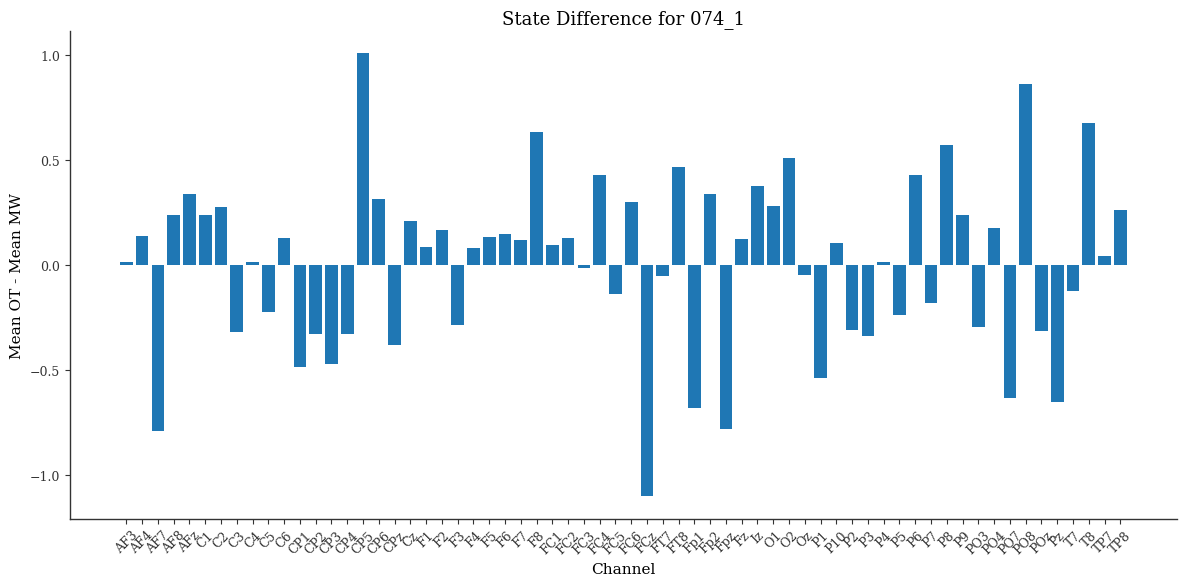

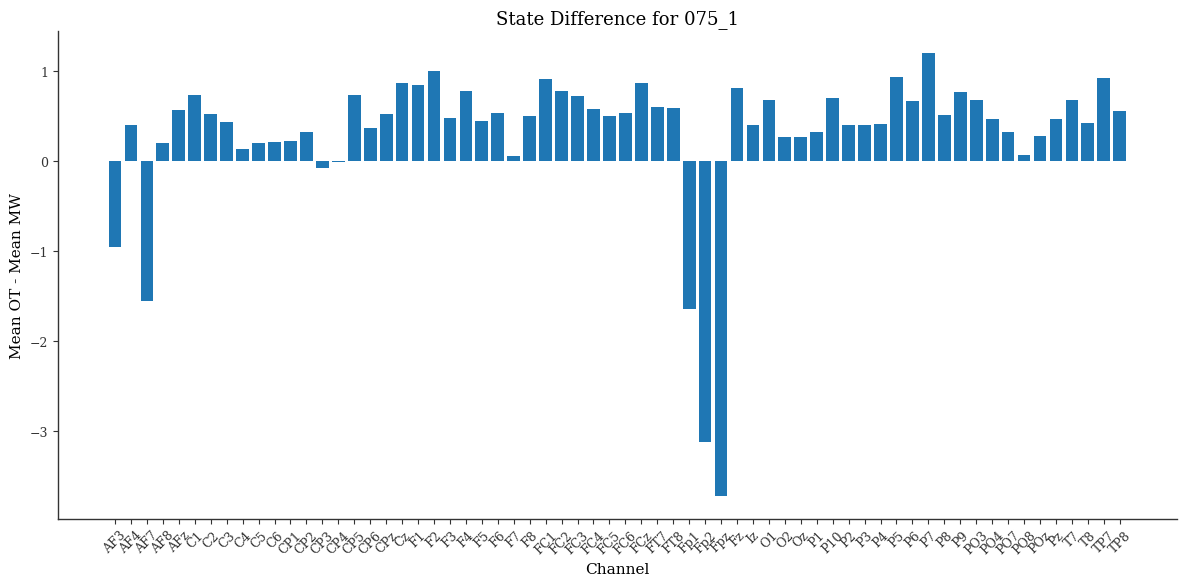

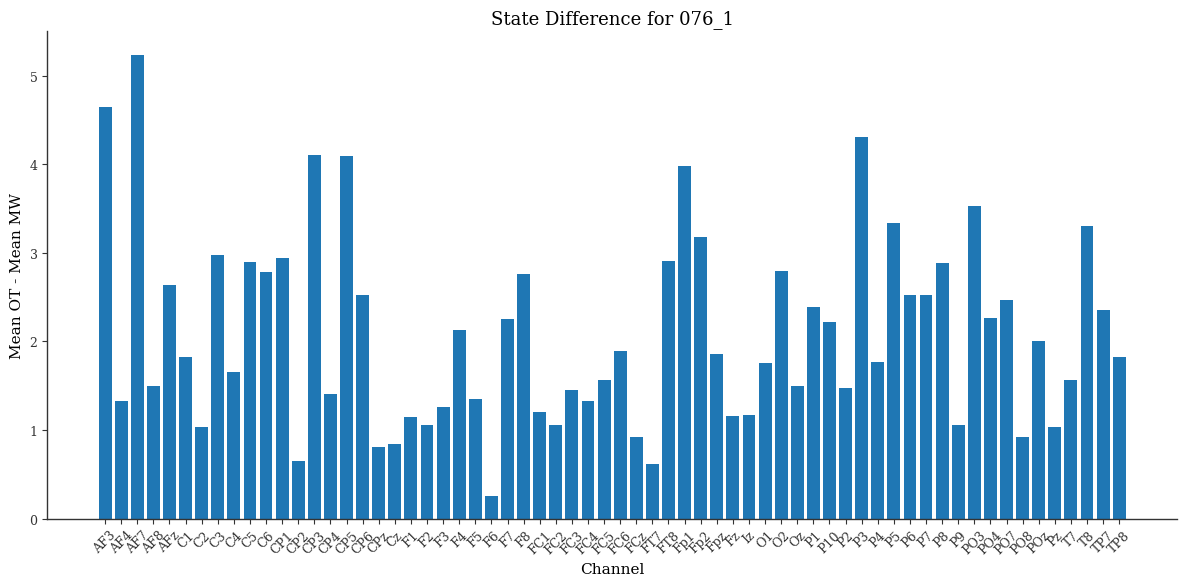

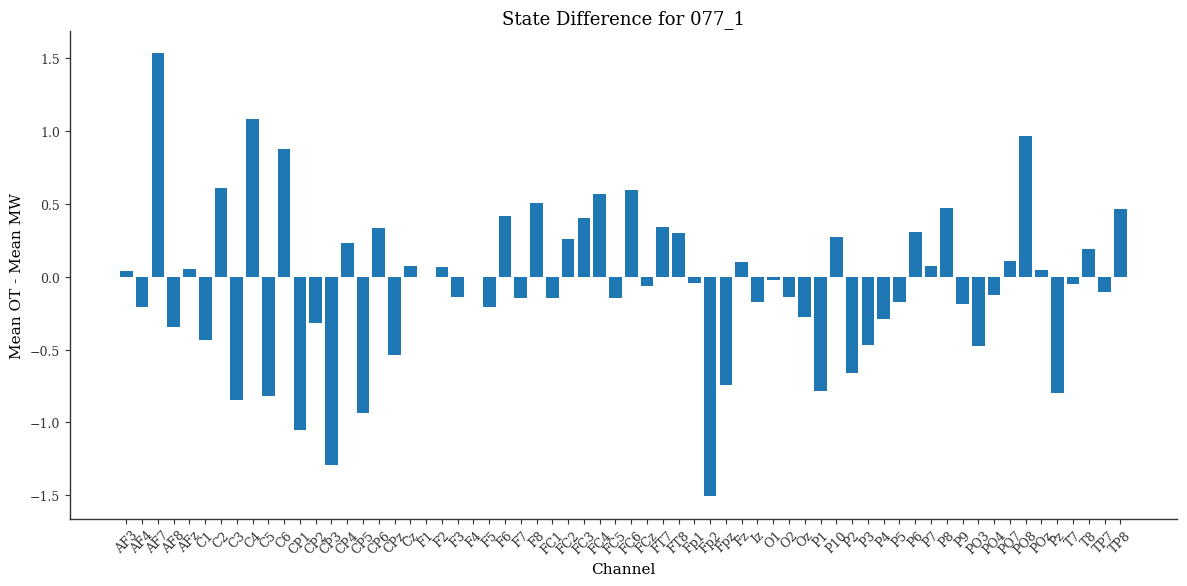

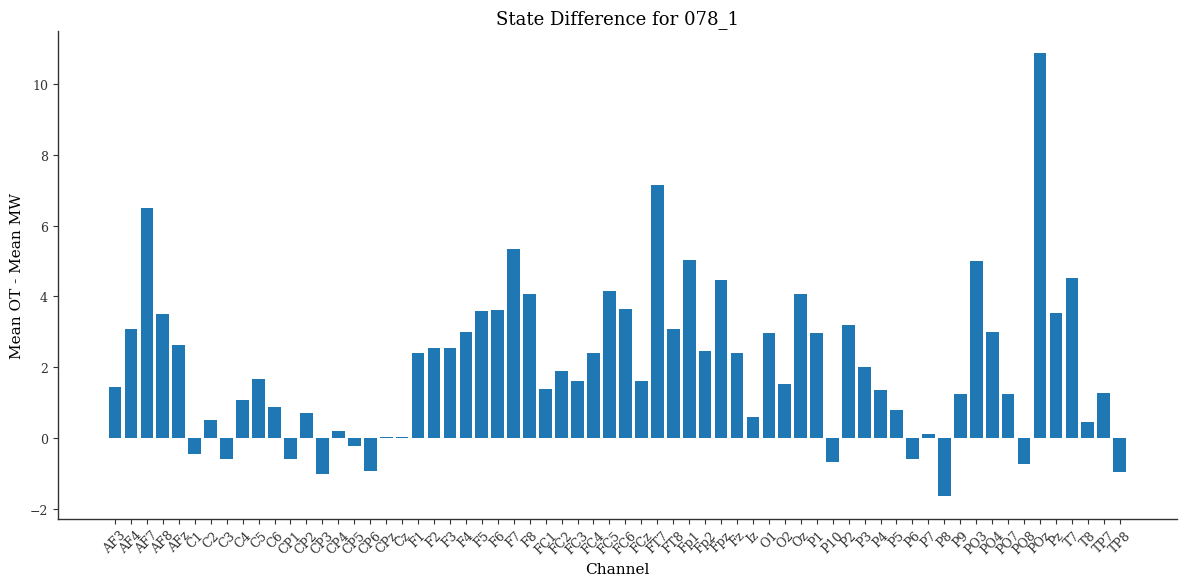

In [51]:
# Subject for subject plot a bar with their state difference
import matplotlib.pyplot as plt
%matplotlib inline
def plot_subject_state_differences(df_summary):
    subjects = df_summary['subject_session'].unique()
    channels = df_summary['channel'].unique()

    for subject in subjects:
        subject_data = df_summary[df_summary['subject_session'] == subject]
        plt.figure(figsize=(12, 6))
        plt.bar(subject_data['channel'], subject_data['state_diff_mean'])
        plt.title(f'State Difference for {subject}')
        plt.xlabel('Channel')
        plt.ylabel('Mean OT - Mean MW')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_subject_state_differences(df_summary)

In [ ]:
# load data from specialization_project/epochs/internal_task/
import mne
epochs_path = "/home/sivert/Documents/Specialization_project/epochs/internal_task/"
def load_epochs(subject, task):
    file_name = f"sub-{subject}_epo.fif"
    file_path = os.path.join(epochs_path, file_name)
    if not os.path.exists(file_path):
        print(f"No epochs found for subject {subject} at {file_path}")
        return None
    print(f"Loading {file_path}")
    epochs = mne.read_epochs(file_path, preload=True)
    
    # Retrieve the group from event_id
    group = next((key.split('/')[0] for key in epochs.event_id if '/' in key), None)
    if not group:
        raise ValueError("No group found in event_id of the epochs")

    # Filter epochs based on task
    event_id = next((key for key in epochs.event_id if f"{group}/{task}" in key), None)
    if not event_id:
        raise ValueError(f"Task '{task}' not found in event_id of the epochs")
    
    return epochs[event_id]

epochs_dict = {}

In [ ]:
# filepath: /home/sivert/Documents/Master_AttentionalDirectionResearch/notebooks/old_data_inspection.ipynb
import pandas as pd

